# Project For P2 - Introduction To Data Analysis

## Introduction
This project seeks to analyse [Lahman’s Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) from 1871 to 2015. I am going to analyse the player/manager awards and their respective salaries and try to understand their relationship.


## The data set

In seanlahman.com serveral options for accquiring the data set are given(access, CSV and sql), for this project it was chosen the CSV files since they can be easily imported with the [pandas](http://pandas.pydata.org/) library.

The data set comes in a zip bundle that contains several CSV files(referred also as tables throught the rest of this project). Each table relates to a set of statistics about pitching, hitting, and fielding statistics for american baseball games from 1871 through 2015. The layout of the contents of CSV files(the order of the columns) and the detailed description of each column can be found in the [dataset readme](http://seanlahman.com/files/database/readme2014.txt).


## Step One - Choose Your Data Set
Choose one of the following datasets to analyze for your project:

* Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.
* Baseball Data - A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This dataset contains many files, but you can choose to analyze only the one(s) you are most interested in.

_Choose the comma-delimited version, which contains CSV files._
**#todo remove**

## Step Two - Get Organized
Eventually you’ll want to submit your project (and share it with friends, family, and employers). Get organized before you begin. We recommend creating a single folder that will eventually contain:

* The report communicating your findings
* Any Python code you wrote as part of your analysis
* The data set you used (which you will not need to submit)
* You may wish to use IPython notebook, in which case you can submit both the code you wrote and the report of your findings in the same document. Otherwise, you will need to submit your report and code separately.

**remove**

## Step Three - Analyze Your Data
Brainstorm some questions you could answer using the data set you chose, then start answering those questions. Here are some ideas to get you started:

### Titanic Data
* What factors made people more likely to survive?

### Baseball Data
* What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
What are the characteristics of baseball players with the highest salaries?


Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation.

_Make sure you use NumPy and Pandas where they are appropriate!_



For this project I'm going to analyse the relationship between player salary and player income.

1. Do salaries increase when a player receives an award?
2. Do salaries increase before a player receives an award?
3. Do salaries keep increasing the more awards a player gets?
4. By how much does a salary is expected to increase after an award?
5. Do players that receive awards tend to play in the same teams?
6. Is there an award winning player creep in teams?(Are some teams collecting award winning players and not hiring other players)?



### Before analyzing I must first import some libraries

In [1]:
import pandas as pd, zipfile, os.path, numpy as np, humanize
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

### And extract the data from the zip file and put it in some variables

In [3]:
def get_dataframe_from_zip(archive, name):
    file_ =  archive.open(os.path.join('baseballdatabank-master/core/', name))
    return pd.read_csv(file_)
with zipfile.ZipFile('baseballdatabank-master_2016-03-02.zip') as archive:
#    allstar_table = get_dataframe_from_zip(archive, 'AllstarFull.csv')
    salaries_table = get_dataframe_from_zip(archive, 'Salaries.csv')
#    master_table = get_dataframe_from_zip(archive, 'Master.csv')
    awardsplayers_table = get_dataframe_from_zip(archive, 'AwardsPlayers.csv')

### Next I want to get a look at the data

In [85]:
salaries_table.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [51]:
ksalary = salaries_table['salary']/1000
ksalary.describe().apply(np.int64)

count    25575
mean      2008
std       3315
min          0
25%        275
50%        550
75%       2250
max      33000
Name: salary, dtype: int64

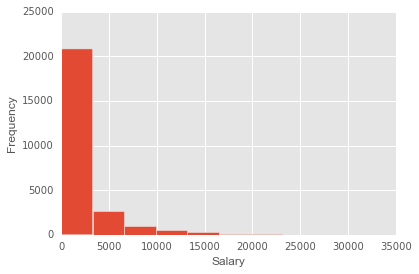

In [53]:
plt.figure()
axes = (ksalary).hist()
axes.set_xlabel("Salary")
axes.set_ylabel("Frequency")

In [55]:
awardsplayers_table.head()

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [59]:
salaries_table.groupby('playerID').count().head()

,yearID,teamID,lgID,salary
playerID,,,,
aardsda01,7,7,7,7
aasedo01,4,4,4,4
abadan01,1,1,1,1
abadfe01,4,4,4,4
abbotje01,4,4,4,4


Now that I'm familiar with the data I can start analyzing

1. Do salaries increase when a player receives an award?

In order to do that I'm going grab the day that a player received his first award and use that to know the average salary before and after the award.

Now before diving into that, is the set of pairs (yearID, playerID) in awards a subset of the set of pairs of (yearID, playerID) in salaries?

In [72]:
# There are some duplcates in the salary table, I should take care of that later
awards_table = awardsplayers_table
salaries_table.count() - salaries_table.drop_duplicates(['playerID', 'yearID']).count()

salaries_table[['playerID', 'yearID']].drop_duplicates().count()

def df_to_set(df):
    return {(tuple(l) if type(l) is list else l) for l in df.values.tolist()}

def set_to_df(set_, columns):
    return DataFrame(list(set_), columns=columns)

def set_subtraction(df1, df2):
    ds1 = df_to_set(df1)
    ds2 = df_to_set(df2)
    subtracted_set = ds2 - ds1
    return set_to_df(subtracted_set, list(df1))

# Ok, we shouldn't expect our resulting table to be as big as the awards table,
# because in some years a player received an award but did not register in the salaries table
subtracted = set_subtraction(salaries_table[['playerID', 'yearID']], awards_table[['playerID', 'yearID']])
print subtracted.count()
subtracted = set_subtraction(awards_table[['playerID', 'yearID']], salaries_table[['playerID', 'yearID']])
print subtracted.count()

playerID    2242
yearID      2242
dtype: int64
playerID    24097
yearID      24097
dtype: int64


So, we can start making the query that we initially set out to make, but before doing that, it's usefult to break it down into steps:

1. Retrieve a list of players that got an award.
2. Retreive a list of years that each player got their first award.
3. Extract a list of salaries before the year of their first award, calculate the mean of those salaries.
4. Extract a list of salaries after the year of their first award, calculate the mean of those salaries.
5. Calculate the average between the differences in salaries.
6. Do the salaries grow?
7. If it exists, is the growth attributable to the award?
8. Explore further.

### Retrieve a list of players that got an award.

In [74]:
playersfromawards = df_to_set(awards_table['playerID'])
playersfromsalaries = df_to_set(salaries_table['playerID'])
awardwinningplayers = set_to_df(playersfromawards.intersection(playersfromsalaries), ['playerID'])
print len(playersfromawards), len(playersfromsalaries), len(awardwinningplayers)
print awardwinningplayers.head()


1323 4963 658
    playerID
0  hrbekke01
1  fostege01
2  hollaal01
3  aurilri01
4  anderga01


### Retreive a list of awards that each player got.

In [121]:
awardsyears = awards_table[['playerID', 'yearID']]
print awardsyears[awardsyears.playerID == 'abreubo01']
awardsyears = awardsyears.merge(awardwinningplayers, on=['playerID'])
print awardsyears.head()
awardsyears = awardsyears.groupby('playerID').first()
print awardsyears.head()

        playerID  yearID
5333  abreubo01    2004
5384  abreubo01    2005
    playerID  yearID
0  ayalabo01    1954
1   rosepe01    1963
2   rosepe01    1965
3   rosepe01    1966
4   rosepe01    1968
           yearID
playerID         
abbotji01    1991
abreubo01    2004
abreujo02    2014
alfonan01    2000
alfoned01    1999
<class 'pandas.core.frame.DataFrame'>


### Extract a list of salaries before the year of their first award, calculate the mean of those salaries.

In [124]:
awardsyears = awardsyears.rename(index=str, columns={"yearID": "firstAward"})

awardsyears.groupby('playerID')
merged = awardsyears.merge(salaries_table, on='playerID')
grouped = merged.groupby('playerID')

def mean_before_first_award(df):
    return df[df.yearID < df.firstAward]['salary'].mean()

print grouped.aggregate(mean_before_first_award).head()

KeyError: 'playerID'

In [84]:
# To answer questions 1 and 2 I need a data structure with the following form:

#salaryAndAwards = [playerID, year, salary, playerAward]

# To get that structure I need to join the salaries table with the awards table:

salaryAndAwards = salaries_table.merge(awardsplayers_table, on=['playerID', 'yearID'], how='left')
salaryAndAwards.head()
salaryAndAwards.count()

yearID      26484
teamID      26484
lgID_x      26484
playerID    26484
salary      26484
awardID      2283
lgID_y       2283
tie            25
notes        1620
dtype: int64

In [83]:
#So to get the ids of players that have received an award I should do:
awardWinningPlayersID = salaryAndAwards[salaryAndAwards['awardID'] != np.NaN]['playerID']
awardWinningPlayersID.head()
awardWinningPlayersID.count()

26484

In [82]:
#So I can get all salaries from award-winning players:
awardWinningPlayersID = pd.DataFrame({'playerID':awardWinningPlayersID})
awardWinningPlayersSalaries = salaryAndAwards.merge(awardWinningPlayersID, on=['playerID']) #something like this
awardWinningPlayersSalaries.head()

,yearID,teamID,lgID_x,playerID,salary,awardID,lgID_y,tie,notes
0,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN
1,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN
2,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN
3,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN
4,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN


And to calculate the years that a player received an award I should do:

`msl09AwardYears = awardWinningPlayers[playerID == 'msl09' and playerAward is not None][year] #does is not none work here?`

To get a list of all the awards that all players received, grouped by playerID i should do:

    playerAwardsGrouped = awardWinningPlayers[playerAward is not None].groupby('playerID')

To get the earliest date that each player have received an award?

   earliestAwardByPlayer = playerAwardsGrouped['date'].min()

Get the all dates below and above the award date??

   beforeAwardRecords = awardWinningPlayers[date < earliestAwardByPlayer]
   afterAwardRecords = awardWinningPlayers[date > earliestAwardByPlayer]

Get the averages

   beforeAverages = beforeAwardRecords['salary'].mean()
   afterAverages= afterAwardRecords['salary'].mean()

Get the difference between before and after award means

    salaryMeanDifferences = afterAverages - beforeAverages
    
Describe findings

    salaryMeanDifferences.describe()
    salaryMeanDifferences.histogram()


And to get the first year that a player received an award I do

`msl09FirstYear = msl09AwardYears.min()`

And to calculate the average salary for a given player before and after he got an award:

`msl09AverageBefore = awardWinningPlayers[playerID == 'msl09' and year < msl09FirstYear]['salary'].average()`
`msl09AverageAfter = awardWinningPlayers[playerID == 'msl09' and year > msl09FirstYear]['salary'].average()`

Is the salary after the award greater than the salary before the award?

    if msl09AverageBefore < msl09AverageAfter:
        print 'It is!'
    else:
        print 'Nope!'

## Step Four - Share Your Findings
Once you have finished analyzing the data, create a report that shares the findings you found most interesting.


## Step Five - Review
Use the Project Rubric to review your project. If you are happy with your submission, then you're ready to submit your project. If you see room for improvement, keep working to improve your project.
